---
title: Implementing Linear Regression
author: Anweshan Adhikari
image: "image.jpg"
description: "Understanding different approaches to implement the Linear Regression Model"
format: html
order: 2
---



# Introduction 
In this blog post, we will be implementing the least square linear regression model in two ways: Analytical Method and Gradient Descent Method. Before diving deeper, let's understand what a  least square linear regression model is. 

A linear regression model simply tries to find a relationship between the features and the target variable. The model does so by minimizing the overall squared deviations between the predicted values and actual values to find the best relationship. The two approaches that we will be implementing are the Analytical Method and Gradient Descent Method. Let's understand how each of these methods work:

`Analytical Method:` When we set the gradient of the loss function to zero, which is the condition for minimizing the loss function, we derive an explicit formula for $\widehat{w}$ i.e 
$\widehat{w} = (X^T X)^{-1} X^T y$. This is a direct method where we don't need to guess parameters iteratively, unlike in gradient descent. However, this method can be computationally expensive and inefficient for large datasets due to the need to compute the inverse of a matrix, which has a computational complexity of O(n^3)

`Gradient Descent Method: ` 
The gradient descent does not try to solve the optimization problem in one go, but it uses an iterative approach to slowly converge towards the minimum of the function. In this method we first start with a random initialization of our parameter vector $\widehat{w}$ and repeteadly adjust the vector. We saw in the lecturenotes that the gradient of the loss function can be computed by $\widehat{w} = (2X^T)(Xw-y)$. On each iteration we can update the weight vector by using the general weight update function $\widehat{w} = \widehat{w} - \alpha * gradient$ and check for convergence. Choosing the learning rate $\alpha$ can be difficult and depending on the value the method can take a very long time to converge or overshoot the minimum and fail to converge.

Here's a link to the code that demonstrates both these methods: [Linear Regression](https://github.com/An65011065/An65011065.github.io/blob/main/posts/Linear%20Regression/Linear_Regression.py)



# Implementation

Let's utilize our the analytic_fit method to first test the analytical method. However, we need to first create a set of training data and validation data.

In [76]:
import numpy as np
from matplotlib import pyplot as plt 

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    #creating a random X_train matrix with n_train rows - data points - and p_features columns - the features
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

To make visualization simpler, we are setting the number of features to 1:

In [77]:
X_train, y_train, X_val, y_val = LR_data(n_train = 100, n_val = 100, p_features = 1, noise = 0.1)

#creating a padded version of X_train and y_train
X_train_padded = pad(X_train)
X_val_padded = pad(X_val)

Here, we are visualizing the data:

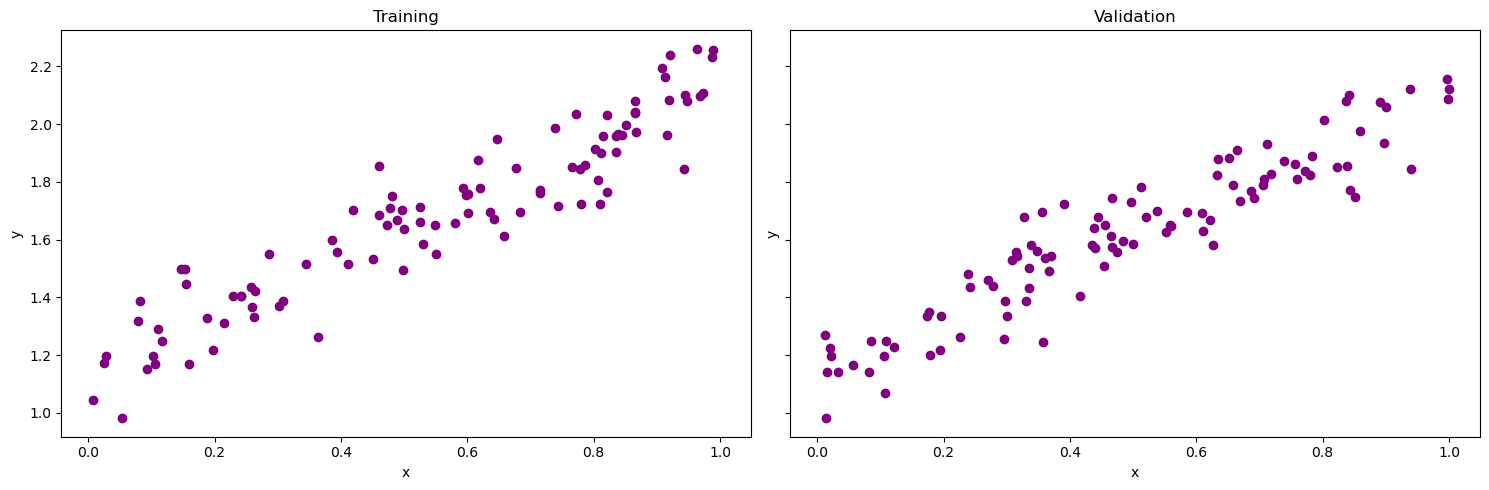

In [78]:
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
plt.rcParams["figure.figsize"] = (15,5)
axarr[0].scatter(X_train, y_train, color="purple")
axarr[1].scatter(X_val, y_val, color="purple")
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x", ylabel = "y")
plt.tight_layout()

We will use our Linear_Regression method in the Linear_Regression Class, to see how our implementation performs on the training and testing data. Printed below is the weight vector, accuracy score on the training data and the validation data.

In [79]:
from Linear_Regression import Linear_Regression

lr = Linear_Regression()

# use the methods of the class
lr.analytic_fit(X_train, y_train)

print(f"Weight vector: {lr.coefficients}")
print(f"Training score: {lr.accuracy_score(X_train, y_train).round(4)}")
print(f"Validation score: {lr.accuracy_score(X_val, y_val).round(4)}")

Weight vector: [1.14598322 0.98235482]
Training score: 0.881
Validation score: 0.8784


The Linear Regression implementation using analytic method seems to do well with both our training and testing data. Let's see, if that is the case with the gradient descent method:

In [80]:
from Linear_Regression import Linear_Regression

lr2 = Linear_Regression()

lr2.gradient_fit(X_train, y_train)

print(f"Weight vector: {lr2.coefficients}")
print(f"Training score: {lr2.accuracy_score(X_train, y_train).round(4)}")
print(f"Validation score: {lr2.accuracy_score(X_val, y_val).round(4)}")

Weight vector: [1.14628734 0.98183735]
Training score: 0.881
Validation score: 0.8784


Both the methods result in the same weight vector and a similar accuracy scores on both the training and validation data. This shows that our implementation is correct because we are solving the same optimization problem.

# Gradient Descent: Accuracy Score over Iterations

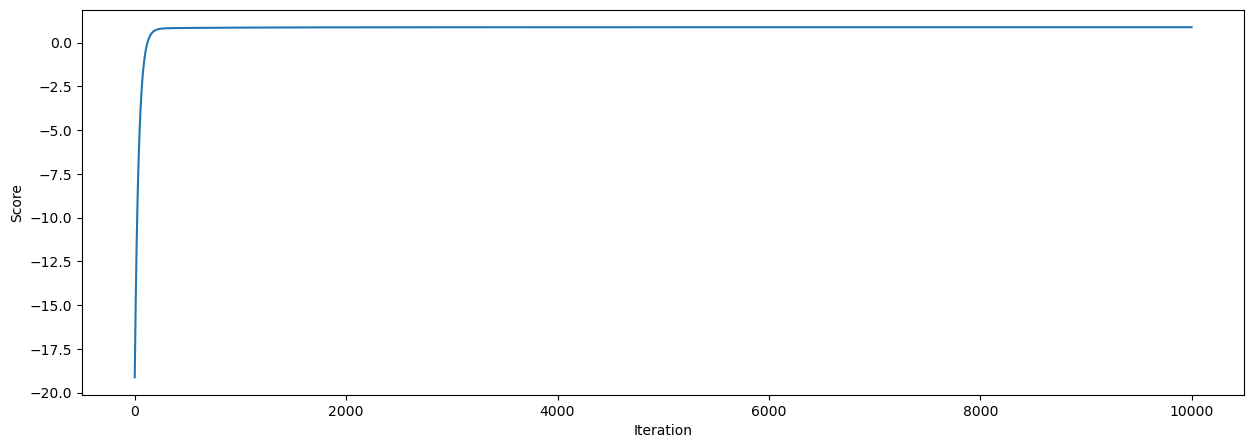

In [81]:
plt.plot(lr2.score_history)
labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")

In our case, we are using the entire dataset in each iteration to calculate the gradient of the cost function, ensuring a consistent improvement in accuracy over iterations (We can see this in the graph above)- as opposed to Stochastic Gradient Descent which utilizes only a single or a few random data points per iteration.

In [ ]:
# Experiment: Number of Features and Accuracy Scores

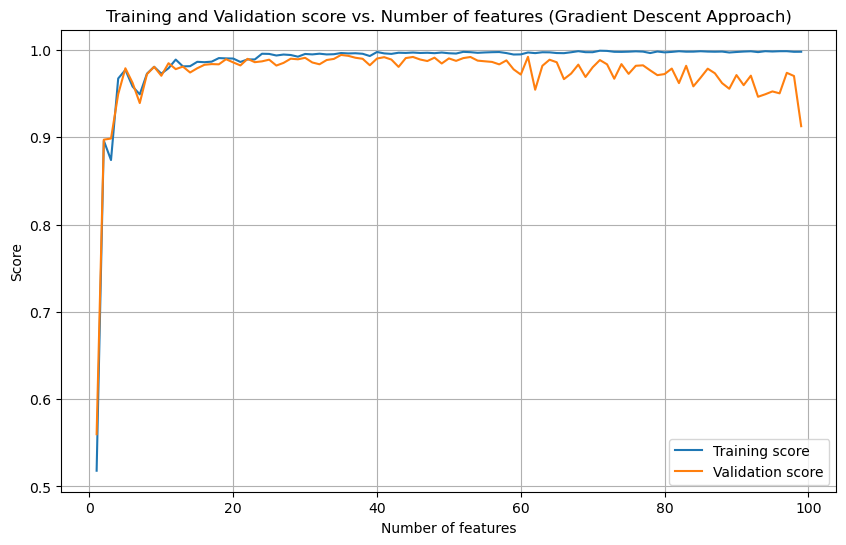

In [104]:
import matplotlib.pyplot as plt

n_train = 100  

lr3 = Linear_Regression()
train_scores = []
val_scores = []

for i in range(1, n_train):
    X_train, y_train, X_val, y_val = LR_data(n_train = 100, n_val = 100, p_features = i, noise = 0.1)
    lr3.gradient_fit(X_train, y_train)
    train_scores.append(lr3.accuracy_score(X_train, y_train))
    val_scores.append(lr3.accuracy_score(X_val, y_val))

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_train), train_scores, label='Training score')
plt.plot(range(1, n_train), val_scores, label='Validation score')
plt.title('Training and Validation score vs. Number of features (Gradient Descent Approach)')
plt.xlabel('Number of features')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


In our original implementation, our model had only one feature. To explore how the number of features influences model performance, we generated datasets with up to 100 features. For each dataset, we increased the number of features by one and calculated the accuracy score on both the training and validation sets.

The model's performance on the training set improved with the addition of each new feature, reaching a near-perfect training score. This is because more features provide the model with more information, allowing it to fit the training databetter. However, in the validation score increased along with the training score, suggesting that the additional features were relating meaningful patterns but after the number of features exceeded 50, the validation score experienced a sharp decline.

This is an example of overfitting. Overfitting occurs when a model learns the training data too closely, including its noise and then fails to adapt appropriately to new data. Overfitting can also be observed in the analaytic approach of linear regression

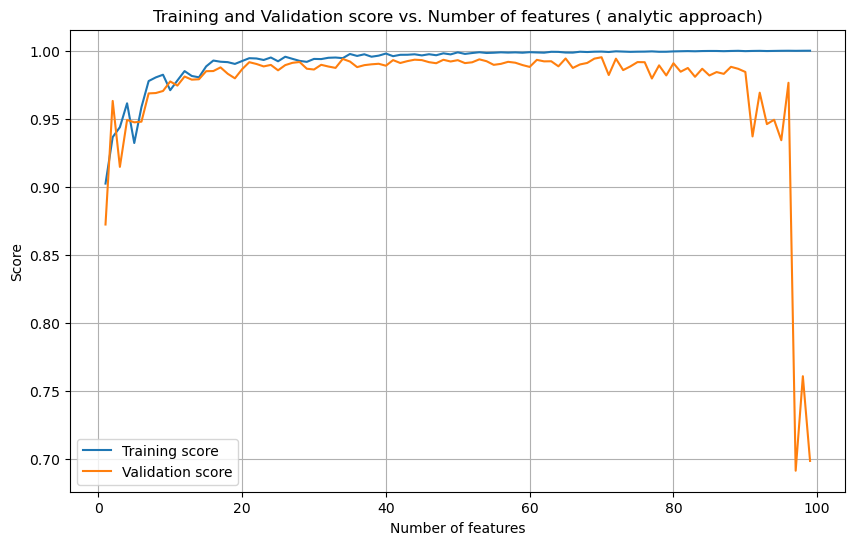

In [99]:
import matplotlib.pyplot as plt

n_train = 100  

lr3 = Linear_Regression()
train_scores = []
val_scores = []

for i in range(1, n_train):
    X_train, y_train, X_val, y_val = LR_data(n_train = 100, n_val = 100, p_features = i, noise = 0.1)
    lr3.analytic_fit(X_train, y_train)
    train_scores.append(lr3.accuracy_score(X_train, y_train))
    val_scores.append(lr3.accuracy_score(X_val, y_val))

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_train), train_scores, label='Training score')
plt.plot(range(1, n_train), val_scores, label='Validation score')
plt.title('Training and Validation score vs. Number of features ( analytic approach)')
plt.xlabel('Number of features')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Implementing LASSO

LASSO is a type of Linear Regression but it implements regularization too. The inclusion of a regularization term in LASSO makes it more robust to overfitting. Let's see how LASSO deals with overfitting:

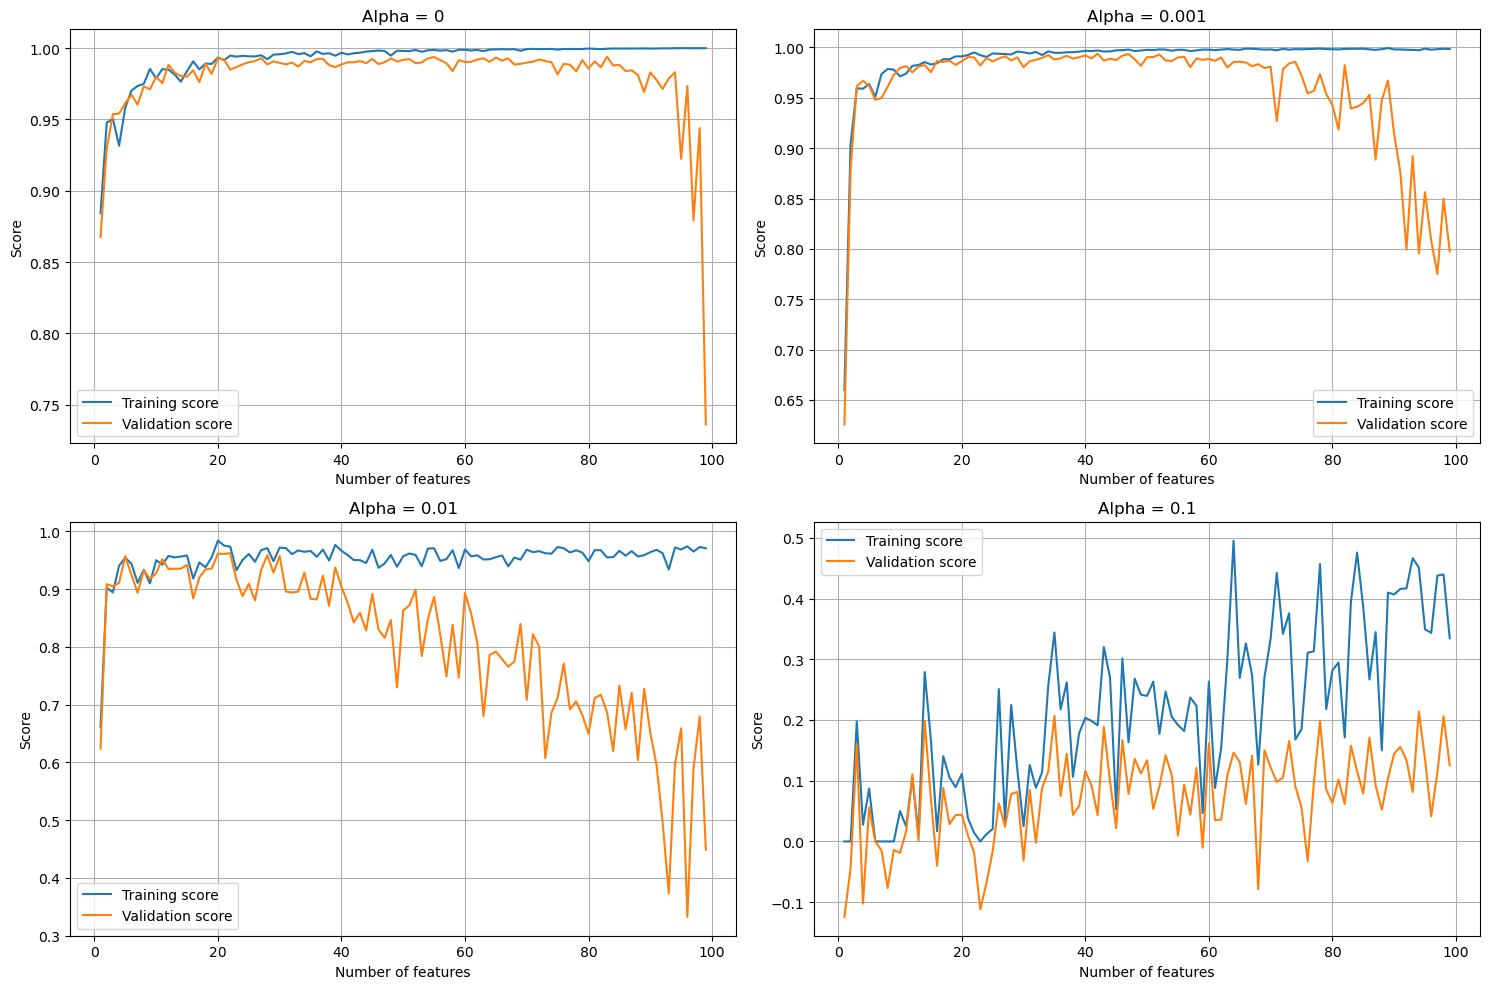

In [103]:
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import Lasso

# Ignore warnings
warnings.filterwarnings('ignore')

alpha_values = [0, 0.001, 0.01, 0.1]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))  
axs = axs.flatten() 

for j, alpha in enumerate(alpha_values):
    train_scores = []
    val_scores = []

    for i in range(1, 100):
        X_train, y_train, X_val, y_val = LR_data(n_train=100, n_val=100, p_features=i, noise=0.1)
        
        L = Lasso(alpha=alpha)
        L.fit(X_train, y_train)

        train_score = L.score(X_train, y_train)
        val_score = L.score(X_val, y_val)
        
        train_scores.append(train_score)
        val_scores.append(val_score)

    axs[j].plot(range(1, 100), train_scores, label=f'Training score')
    axs[j].plot(range(1, 100), val_scores, label=f'Validation score')
    axs[j].set_title(f'Alpha = {alpha}')
    axs[j].set_xlabel('Number of features')
    axs[j].set_ylabel('Score')
    axs[j].legend()
    axs[j].grid()

plt.tight_layout()
plt.show()



When alpha is 0, it indicates no regularization. Hence the outcome should be no different than the standard linear regression model. 
As the alpha- the variable that controls regularization- increases, the performance on the performance on validation data is more consistent. This indicates that regularization in linear regression models is significant in combating overfitting.